#importing the nesseary libraryes 

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [10]:
data = pd.read_csv("Titanic survived Project.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
data.shape

(891, 12)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Handling the missing values

In [15]:
#Droping the "cabin" column from dataframe
data = data.drop(columns = "Cabin", axis=1)

In [16]:
#replacing the missing values in "Age" coloumn with mean value
data['Age'].fillna(data['Age'].mean(), inplace=True)

In [17]:
# finding the mode value of "Embarked" column
print(data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [18]:
print(data['Embarked'].mode()[0])

S


In [20]:
# replacimg the missing value "Embarked" column with the mode value 
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

In [21]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Data Analysis

In [22]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
#finding the number of survived and not survived
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Data Visualization 

In [24]:
sns.set()

<AxesSubplot:xlabel='Survived', ylabel='count'>

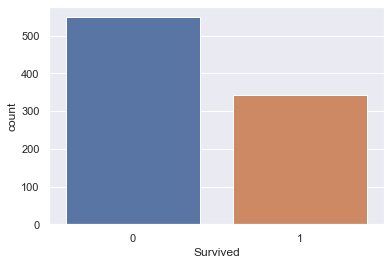

In [25]:
#making a count plot for 'Survived' column
sns.countplot('Survived', data = data)

In [27]:
#finding the number of Sex and not survived
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

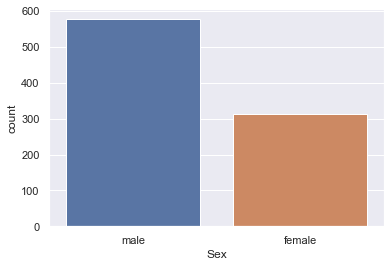

In [26]:
#making a count plot for 'Sex' column
sns.countplot('Sex', data = data)

<AxesSubplot:xlabel='Sex', ylabel='count'>

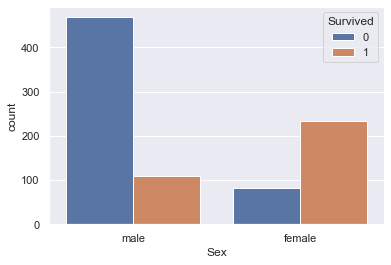

In [28]:
#Number of surviver gender-wise
sns.countplot('Sex', hue = 'Survived', data = data)

In [31]:
#finding the number of Pclass and not survived
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

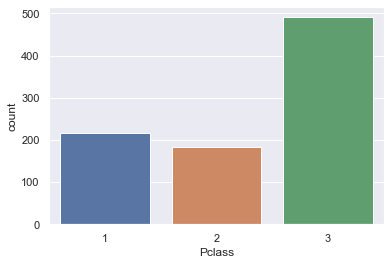

In [30]:
#making a count plot for 'Pclass' column
sns.countplot('Pclass', data = data)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

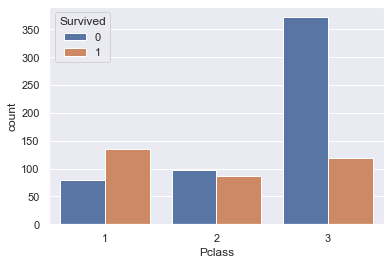

In [32]:
#Number of surviver Pclass-wise
sns.countplot('Pclass', hue = 'Survived', data = data)

Encoding the categorical data

In [33]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [34]:
data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [44]:
data.replace({'Sex': {'male':0, 'female':1}, 'Embarked': {'S':0, 'C':1, 'Q':2}}, inplace=True)

In [45]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


Sepration of target and feature columns

In [47]:
X = data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
Y = data['Survived']

In [48]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [49]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


Spliting data in test and trainging data

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [51]:
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


# Model Training

In [52]:
model = LogisticRegression()

In [55]:
model.fit(X_train,Y_train)

LogisticRegression()

Model Evaluation

In [56]:
#Accuracy Score

In [57]:
X_train_prediction = model.predict(X_train)

In [58]:
print(X_train_prediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 

In [60]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [62]:
print("Accuracy Score = ", training_data_accuracy)

Accuracy Score =  0.8075842696629213


In [63]:
X_test_prediction = model.predict(X_test)

In [64]:
print(X_test_prediction)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [65]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [66]:
print("Accuracy Score = ", test_data_accuracy)

Accuracy Score =  0.7821229050279329


In [95]:
Conf_mat_train = confusion_matrix(Y_train,X_train_prediction)
Conf_mat_train

array([[390,  59],
       [ 78, 185]], dtype=int64)

In [96]:
Conf_mat_test = confusion_matrix(Y_test,X_test_prediction)
Conf_mat_test

array([[91,  9],
       [30, 49]], dtype=int64)

Calculation of recall,precision and F1 score

In [97]:
from sklearn.metrics import classification_report

In [98]:
print(classification_report(Y_train,X_train_prediction))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       449
           1       0.76      0.70      0.73       263

    accuracy                           0.81       712
   macro avg       0.80      0.79      0.79       712
weighted avg       0.81      0.81      0.81       712



In [99]:
print(classification_report(Y_test,X_test_prediction))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82       100
           1       0.84      0.62      0.72        79

    accuracy                           0.78       179
   macro avg       0.80      0.77      0.77       179
weighted avg       0.79      0.78      0.78       179



In [100]:
fpr,tpr,thresholds =roc_curve(Y_test,X_test_prediction)

In [101]:
print("Fales positive rate",fpr)
print("True positive rate",tpr)
print("Thresholds",thresholds)

Fales positive rate [0.   0.09 1.  ]
True positive rate [0.         0.62025316 1.        ]
Thresholds [2 1 0]


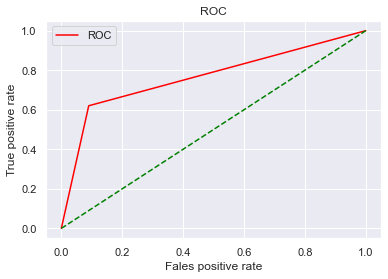

In [104]:
plt.plot(fpr,tpr,color='red',label='ROC')
plt.plot([0,1],[0,1],color='green',linestyle='--')
plt.xlabel('Fales positive rate')
plt.ylabel('True positive rate')
plt.title('ROC')
plt.legend()
plt.show()

# Building a predicative system

In [75]:
input_data = (1,1,38,1,0,71.2833,1)
input_data_as_numpy_array = np.asarray(input_data)

In [76]:
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)


In [77]:
prediction = model.predict(input_data_reshaped)
#print(prediction)
if prediction[0]==0:
    print("Not Survived")
if prediction[0]==1:
    print("Survived")

Survived
